<a href="https://colab.research.google.com/github/akshatamadavi/data_mining/blob/main/clustering/02_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part B: Hierarchical Clustering

This notebook implements hierarchical clustering algorithms using scipy and sklearn libraries. Hierarchical clustering creates a tree-like structure (dendrogram) showing the nested grouping of data points.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.datasets import load_iris, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 1. Load and Prepare Dataset

We'll use the Iris dataset for demonstration.

In [ ]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dataset shape: {X.shape}")
print(f"Features: {iris.feature_names}")
print(f"Number of classes: {len(np.unique(y_true))}")

Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of classes: 3


## 2. Dendrograms with Different Linkage Methods

Dendrograms visualize the hierarchical clustering structure showing how clusters merge at different heights.

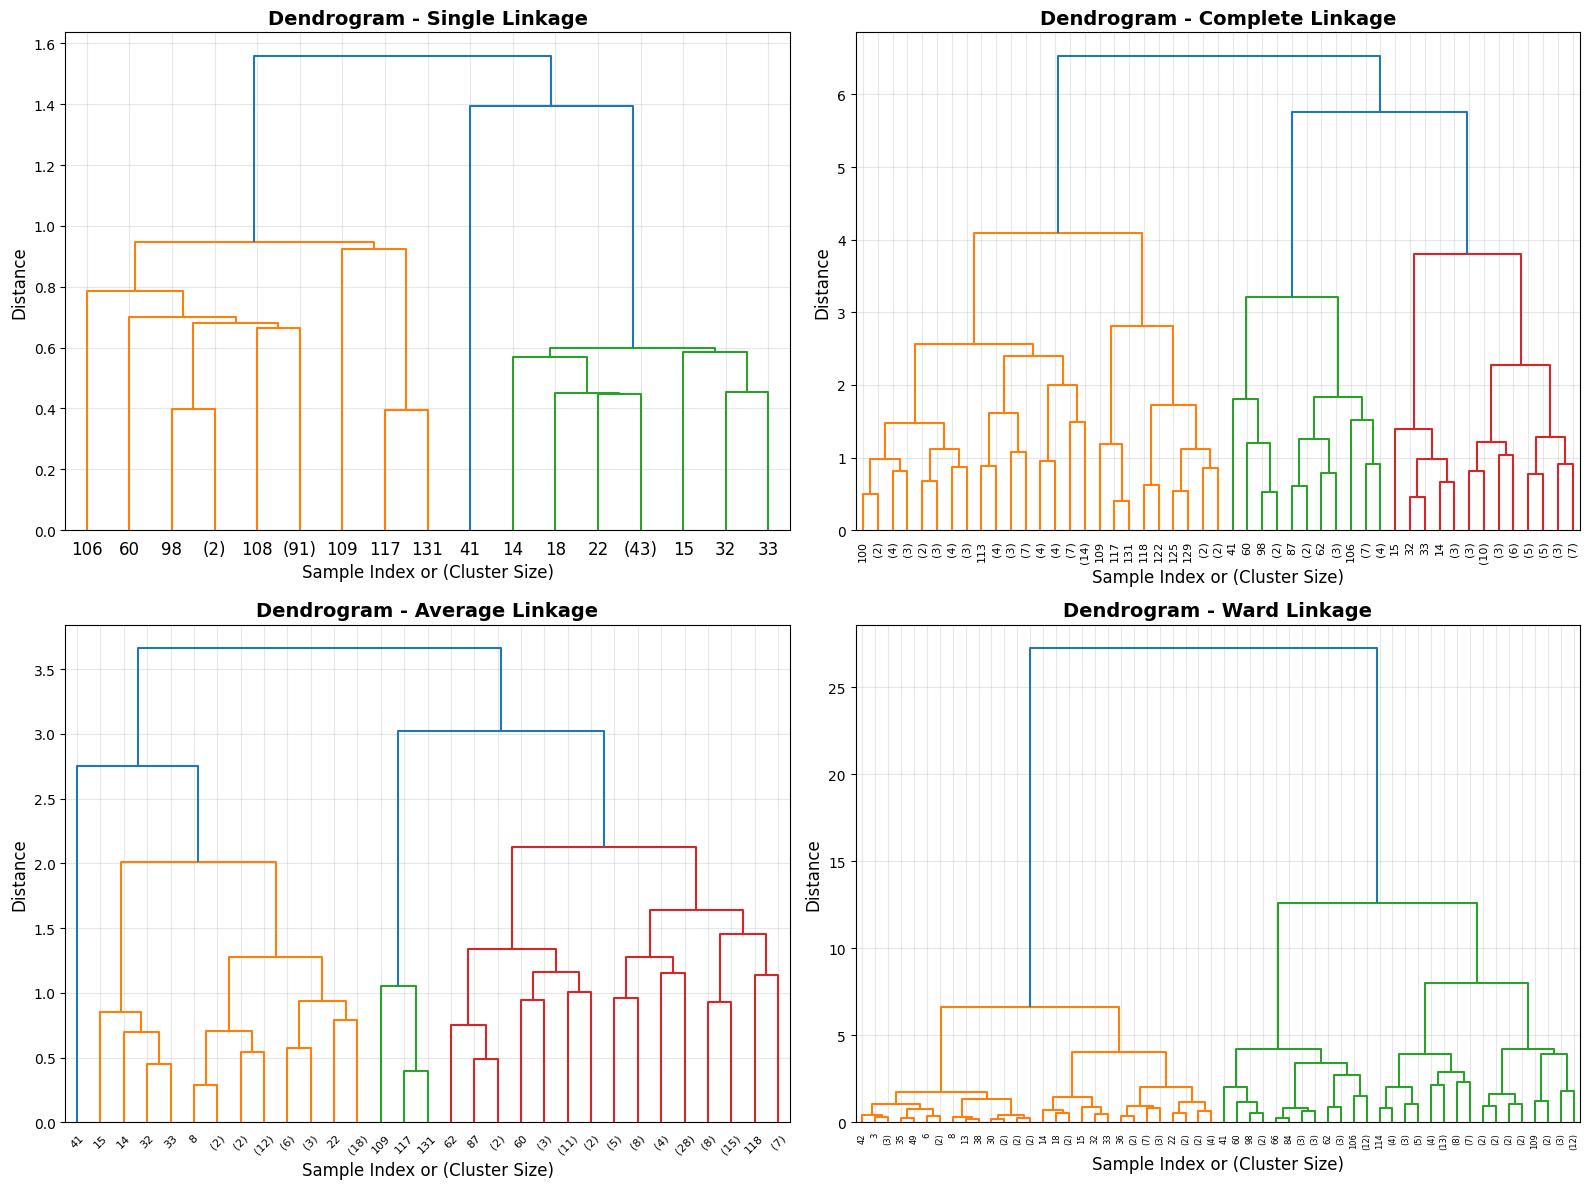

✓ Dendrograms created for all linkage methods!


In [ ]:
# Create dendrograms for different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, method in enumerate(linkage_methods):
    Z = linkage(X_scaled, method=method)
    ax = axes[idx]
    dendrogram(Z, ax=ax, truncate_mode='level', p=5)
    ax.set_title(f'Dendrogram - {method.capitalize()} Linkage', fontsize=14, fontweight='bold')
    ax.set_xlabel('Sample Index or (Cluster Size)', fontsize=12)
    ax.set_ylabel('Distance', fontsize=12)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Dendrograms created for all linkage methods!")


## 3. Agglomerative Clustering with sklearn

Apply hierarchical clustering and compare different linkage methods.


In [ ]:
n_clusters = 3
results = {}

for method in ['ward', 'complete', 'average', 'single']:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    labels = model.fit_predict(X_scaled)

    silhouette = silhouette_score(X_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_scaled, labels)
    calinski = calinski_harabasz_score(X_scaled, labels)

    results[method] = {
        'labels': labels,
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'calinski': calinski
    }

    print(f"\n{method.upper()} Linkage:")
    print(f"  Silhouette Score: {silhouette:.4f}")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"  Calinski-Harabasz Score: {calinski:.2f}")



WARD Linkage:
  Silhouette Score: 0.4467
  Davies-Bouldin Index: 0.8035
  Calinski-Harabasz Score: 222.72

COMPLETE Linkage:
  Silhouette Score: 0.4496
  Davies-Bouldin Index: 0.7584
  Calinski-Harabasz Score: 213.08

AVERAGE Linkage:
  Silhouette Score: 0.4803
  Davies-Bouldin Index: 0.5753
  Calinski-Harabasz Score: 149.03

SINGLE Linkage:
  Silhouette Score: 0.5046
  Davies-Bouldin Index: 0.4929
  Calinski-Harabasz Score: 131.54


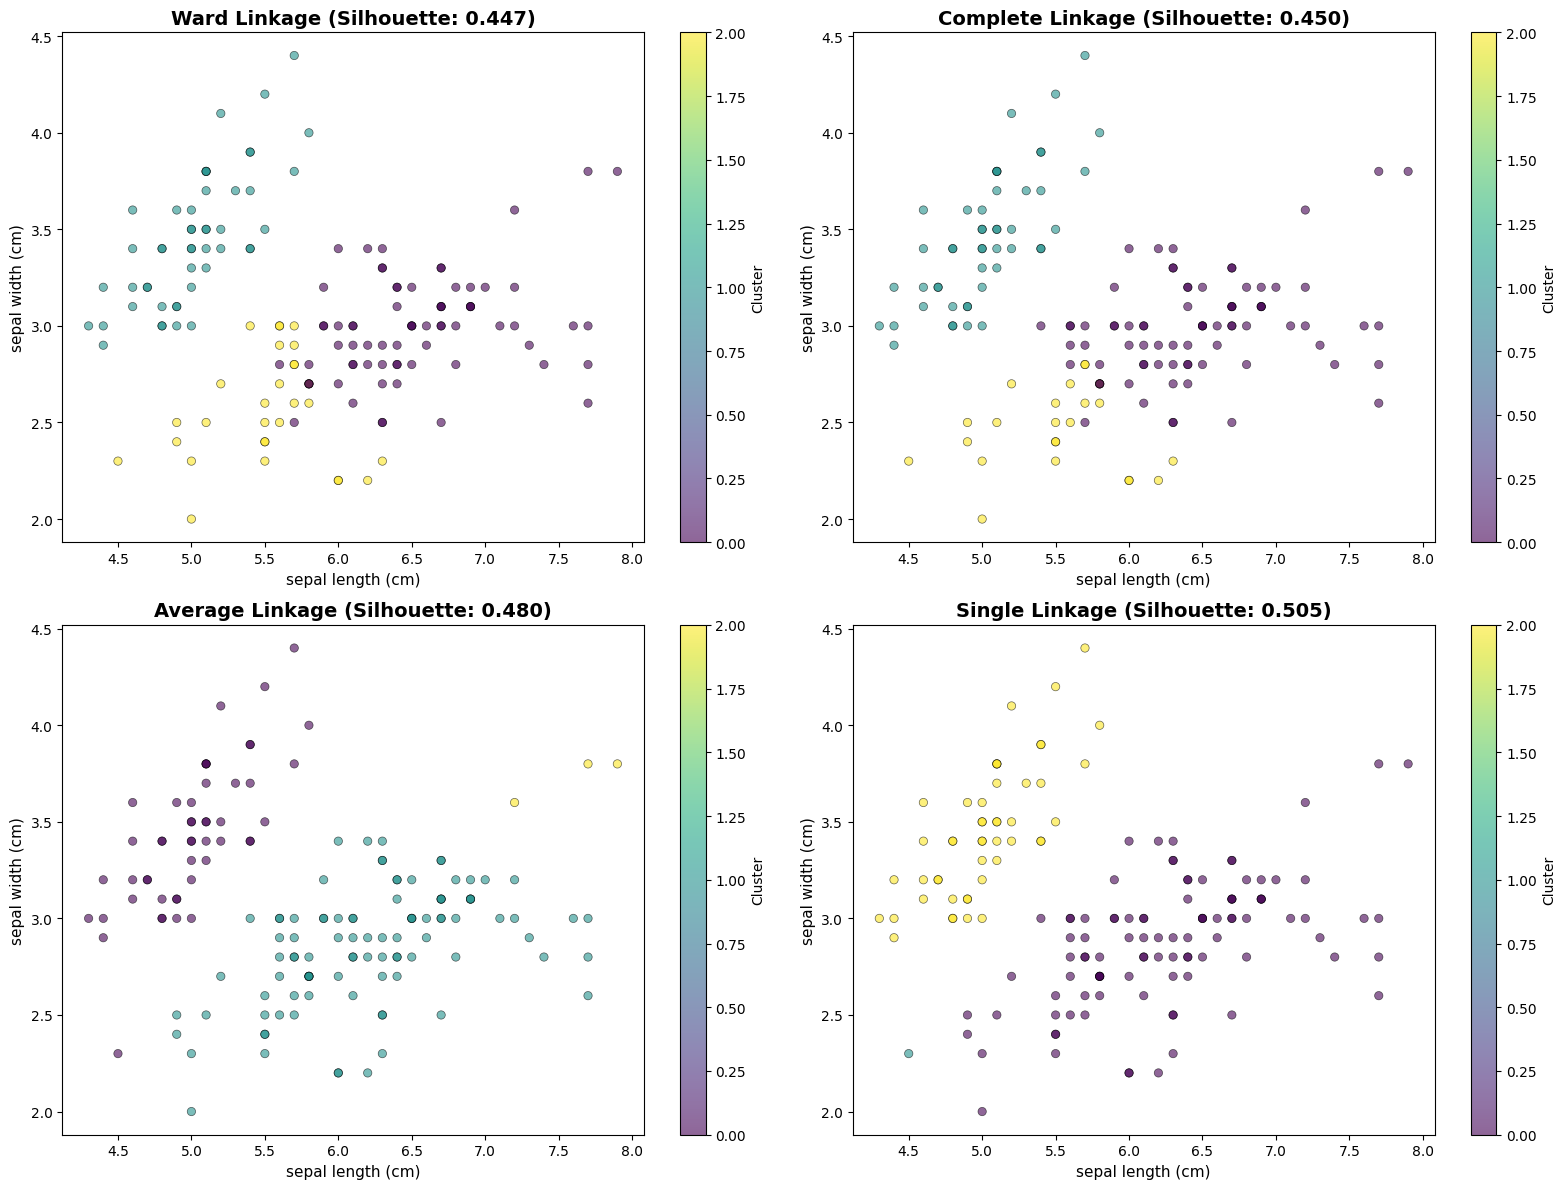

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, method in enumerate(['ward', 'complete', 'average', 'single']):
    ax = axes[idx]
    labels = results[method]['labels']
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',
                        alpha=0.6, edgecolors='black', linewidth=0.5)
    ax.set_title(f'{method.capitalize()} Linkage (Silhouette: {results[method]["silhouette"]:.3f})',
                fontsize=14, fontweight='bold')
    ax.set_xlabel(iris.feature_names[0], fontsize=11)
    ax.set_ylabel(iris.feature_names[1], fontsize=11)
    plt.colorbar(scatter, ax=ax, label='Cluster')

plt.tight_layout()
plt.show()


In [ ]:
comparison_df = pd.DataFrame({
    'Linkage Method': list(results.keys()),
    'Silhouette Score': [results[m]['silhouette'] for m in results.keys()],
    'Davies-Bouldin Index': [results[m]['davies_bouldin'] for m in results.keys()],
    'Calinski-Harabasz Score': [results[m]['calinski'] for m in results.keys()]
})

print("\n" + "="*70)
print("HIERARCHICAL CLUSTERING - COMPARISON")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)



HIERARCHICAL CLUSTERING - COMPARISON
Linkage Method  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Score
          ward          0.446689              0.803467               222.719164
      complete          0.449618              0.758358               213.081710
       average          0.480267              0.575269               149.025799
        single          0.504646              0.492925               131.535896


## Summary

This notebook demonstrates hierarchical clustering with:
- **Multiple linkage methods**: single, complete, average, and ward
- **Dendrogram visualizations**: showing cluster hierarchy at different heights
- **Agglomerative Clustering**: using sklearn's implementation
- **Comprehensive evaluation**: silhouette, Davies-Bouldin, and Calinski-Harabasz scores
- **Comparative analysis**: identifying the best linkage method for the dataset

**Key Finding**: Ward linkage typically performs best for well-separated clusters like the Iris dataset.
